## Check the pervoskite experimental data produced on Nov 11, 2020

- Experiments are prepared by Nick Rolston and Thomas Colburn (Stanfrod University) 
- Jupyter Notebook is prepared by Zhe Liu (Massachusetts Insititute of Technology)


In [1]:
import numpy as np
import pandas as pd
import emukit
import GPy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_film = pd.read_excel('./ML Perov Data/ML perov data stanford.xlsx', sheet_name='2020_09_22_film')
df_film.columns = ['ML Condition', 'Temperature [\N{DEGREE SIGN}C]', 'Speed [mm/s]',
       'Spray Flow [uL/min]', 'Plasma Height [cm]', 'Plasma Gas Flow [L/min]', 'Plasma DC [%]',
       'Success or Fail', 'Notes']
df_film_20200922 = df_film

df_film = pd.read_excel('./ML Perov Data/ML perov data stanford.xlsx', sheet_name='2020_09_30_film')
df_film.columns = ['ML Condition', 'Temperature [\N{DEGREE SIGN}C]', 'Speed [mm/s]',
       'Spray Flow [uL/min]', 'Plasma Height [cm]', 'Plasma Gas Flow [L/min]', 'Plasma DC [%]',
       'Success or Fail', 'Notes']
df_film_20200930 = df_film


df_film = pd.read_excel('./ML Perov Data/ML perov data stanford.xlsx', sheet_name='2020_10_19_film')
df_film.columns = ['ML Condition', 'Temperature [\N{DEGREE SIGN}C]', 'Speed [mm/s]',
       'Spray Flow [uL/min]', 'Plasma Height [cm]', 'Plasma Gas Flow [L/min]', 'Plasma DC [%]',
       'Success or Fail', 'Notes']
df_film_20201019 = df_film


df_film = pd.read_excel('./ML Perov Data/ML perov data stanford.xlsx', sheet_name='2020_10_25_film')
df_film.columns = ['ML Condition', 'Temperature [\N{DEGREE SIGN}C]', 'Speed [mm/s]',
       'Spray Flow [uL/min]', 'Plasma Height [cm]', 'Plasma Gas Flow [L/min]', 'Plasma DC [%]',
       'Success or Fail', 'Notes']
df_film_20201025 = df_film

df_film = pd.read_excel('./ML Perov Data/ML perov data stanford.xlsx', sheet_name='2020_11_08_film')
df_film.columns = ['ML Condition', 'Temperature [\N{DEGREE SIGN}C]', 'Speed [mm/s]',
       'Spray Flow [uL/min]', 'Plasma Height [cm]', 'Plasma Gas Flow [L/min]', 'Plasma DC [%]',
       'Success or Fail', 'Notes']
df_film_20201108 = df_film

df_film = pd.concat([df_film_20200922, df_film_20200930, df_film_20201019,
                     df_film_20201025,df_film_20201108], ignore_index = True)#.sort_values(by=list(df_film.columns[1:7]))
df_film.iloc[:,2] = df_film.iloc[:,2] /10
df_film.iloc[:,3] = df_film.iloc[:,3] /1000

df_film = df_film[df_film['ML Condition'] != 'Y']
success_conditions = df_film[df_film['Success or Fail']==1]['ML Condition'].values
failed_conditions = df_film[df_film['Success or Fail']==0]['ML Condition'].values


df_film

,ML Condition,Temperature [°C],Speed [mm/s],Spray Flow [uL/min],Plasma Height [cm],Plasma Gas Flow [L/min],Plasma DC [%],Success or Fail,Notes
0,0,155,20.0,5.0,1.2,35,50,1,early cure
1,1,160,22.5,3.0,0.8,30,75,0,NaN
2,2,135,20.0,2.5,1.0,25,75,1,"pale, yellow"
3,3,150,17.5,2.0,1.0,20,100,0,cure before plasma
4,4,170,27.5,4.5,1.2,16,50,0,NaN
...,...,...,...,...,...,...,...,...,...
96,95,140,15.0,3.5,1.2,20,50,1,NaN
97,96,140,15.0,3.5,1.0,20,50,1,NaN
98,97,145,12.5,3.0,1.2,16,50,1,NaN
99,98,150,17.5,3.5,1.0,16,50,1,NaN


In [3]:
df_device = pd.read_excel('./ML Perov Data/ML perov data stanford.xlsx', sheet_name='2020_09_22_device')
df_device.columns = ['ML Condition', 'Sample', 'Temperature [\N{DEGREE SIGN}C]', 'Speed [mm/s]',
       'Spray Flow [uL/min]', 'Plasma Height [cm]', 'Plasma Gas Flow [L/min]', 'Plasma DC [%]',
       'Isc [mA]', 'Jsc [mA/cm2]', 'Voc [V]', 'FF [-]', 'Efficiency [%]']
df_device_20200922 = df_device

df_device = pd.read_excel('./ML Perov Data/ML perov data stanford.xlsx', sheet_name='2020_09_30_device')
df_device.columns = ['ML Condition', 'Sample', 'Temperature [\N{DEGREE SIGN}C]', 'Speed [mm/s]',
       'Spray Flow [uL/min]', 'Plasma Height [cm]', 'Plasma Gas Flow [L/min]', 'Plasma DC [%]',
       'Isc [mA]', 'Jsc [mA/cm2]', 'Voc [V]', 'FF [-]', 'Efficiency [%]']
df_device_20200930 = df_device

df_device = pd.read_excel('./ML Perov Data/ML perov data stanford.xlsx', sheet_name='2020_10_19_device')
df_device.columns = ['ML Condition', 'Sample', 'Temperature [\N{DEGREE SIGN}C]', 'Speed [mm/s]',
       'Spray Flow [uL/min]', 'Plasma Height [cm]', 'Plasma Gas Flow [L/min]', 'Plasma DC [%]',
       'Isc [mA]', 'Jsc [mA/cm2]', 'Voc [V]', 'FF [-]', 'Efficiency [%]']
df_device_20201019 = df_device

df_device = pd.read_excel('./ML Perov Data/ML perov data stanford.xlsx', sheet_name='2020_10_25_device')
df_device.columns = ['ML Condition', 'Sample', 'Temperature [\N{DEGREE SIGN}C]', 'Speed [mm/s]',
       'Spray Flow [uL/min]', 'Plasma Height [cm]', 'Plasma Gas Flow [L/min]', 'Plasma DC [%]',
       'Isc [mA]', 'Jsc [mA/cm2]', 'Voc [V]', 'FF [-]', 'Efficiency [%]']
df_device_20201025 = df_device

df_device = pd.read_excel('./ML Perov Data/ML perov data stanford.xlsx', sheet_name='2020_11_08_device')
df_device.columns = ['ML Condition', 'Sample', 'Temperature [\N{DEGREE SIGN}C]', 'Speed [mm/s]',
       'Spray Flow [uL/min]', 'Plasma Height [cm]', 'Plasma Gas Flow [L/min]', 'Plasma DC [%]',
       'Isc [mA]', 'Jsc [mA/cm2]', 'Voc [V]', 'FF [-]', 'Efficiency [%]']
df_device_20201108 = df_device

df_device = pd.concat([df_device_20200922, df_device_20200930, df_device_20201019,
                       df_device_20201025, df_device_20201108], ignore_index = True)#.sort_values(by=list(df_film.columns[1:7]))
df_device.iloc[:,3] = df_device.iloc[:,3] /10
df_device.iloc[:,4] = df_device.iloc[:,4] /1000

df_device = df_device[df_device['ML Condition'] != 'Y']
df_device_all = df_device.copy()
df_device = df_device.sort_values(by=list(df_device.iloc[:,[0,-1]].columns)).drop_duplicates('ML Condition', keep = 'last', ignore_index = True)
df_device_failed = df_device[df_device['ML Condition'].isin(failed_conditions)]
df_device = df_device[df_device['ML Condition'].isin(success_conditions)]
df_device

,ML Condition,Sample,Temperature [°C],Speed [mm/s],Spray Flow [uL/min],Plasma Height [cm],Plasma Gas Flow [L/min],Plasma DC [%],Isc [mA],Jsc [mA/cm2],Voc [V],FF [-],Efficiency [%]
0,0,B29R_3-FR0.dat,155,20.0,5.0,1.2,35,50,3.415,16.2619,0.932514,0.39,5.914137
2,2,B18RPALE_4-FR0.dat,135,20.0,2.5,1.0,25,75,4.867,23.1761,0.926920,0.60,12.889485
6,6,B10R_AFTERUP2-FR0.dat,140,15.0,4.0,1.0,20,75,4.181,19.9090,1.023000,0.69,14.053536
8,8,B15R_AFTERUP-FR0.dat,130,17.5,3.5,0.8,25,75,4.595,21.8800,1.044000,0.74,16.904349
9,9,B20RGAPPY_AFTER2UP2-FR0.dat,135,12.5,2.5,1.2,20,25,4.630,22.0476,1.025000,0.71,16.045155
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,F7R.dat,140,15.0,3.5,1.2,20,50,4.155,19.7860,1.021000,0.79,15.959000
95,96,F6R.dat,140,15.0,3.5,1.0,20,50,3.976,18.9330,0.978000,0.58,10.739000
96,97,F24R.dat,145,12.5,3.0,1.2,16,50,4.778,22.7520,0.987000,0.74,16.621000
97,98,F42L.dat,150,17.5,3.5,1.0,16,50,5.551,26.4330,0.978000,0.58,14.988000


In [4]:
success_conditions

array([0, 2, 6, 8, 9, 10, 11, 12, 14, 15, 17, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 58, 59, 60, 61, 62,
       63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 78, 80, 81, 82,
       83, 84, 85, 86, 87, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=object)

In [5]:
df_device.iloc[df_device['Efficiency [%]'].values>17]

,ML Condition,Sample,Temperature [°C],Speed [mm/s],Spray Flow [uL/min],Plasma Height [cm],Plasma Gas Flow [L/min],Plasma DC [%],Isc [mA],Jsc [mA/cm2],Voc [V],FF [-],Efficiency [%]
11,11,B23R_AFTER2UP2-FR0.dat,145,12.5,3.50,1.00,25,50,4.682,22.295200,1.031000,0.77,17.699521
43,44,D33R,135,15.0,4.00,0.80,20,50,4.705,22.404762,1.007000,0.77,17.372428
45,46,D37L,135,17.5,4.00,1.20,20,50,4.659,22.185710,0.997484,0.77,17.040020
66,67,E18R,140,15.0,3.50,1.20,20,50,4.766,22.695240,0.980023,0.77,17.126230
71,72,E28R,145,12.5,3.00,1.20,16,50,4.823,22.966670,0.985011,0.77,17.419260
77,78,E41R,150,17.5,3.50,1.00,16,50,4.771,22.719050,1.023000,0.76,17.663610
80,81,F19R.dat,145,13.0,3.09,1.10,17,29,4.869,23.186000,0.975000,0.77,17.414000
86,87,F16R again.dat,143,16.3,3.34,1.15,19,31,4.548,21.657000,1.000000,0.80,17.318000
88,89,F22R again again.dat,145,14.5,3.49,1.20,19,27,4.948,23.562000,1.004000,0.78,18.452000


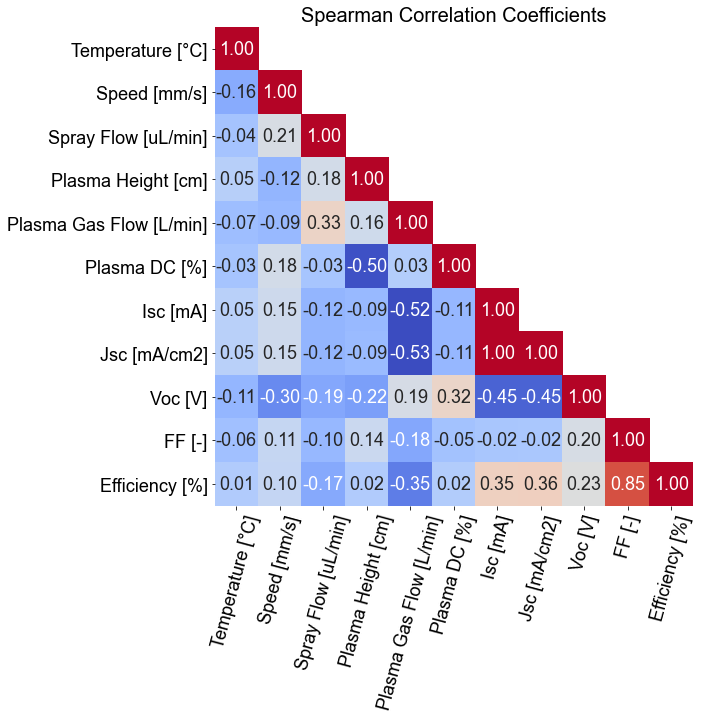

In [6]:
df = df_device#.sort_values(by=list(df_device.iloc[:,[0,-1]].columns)).drop_duplicates('ML Condition', keep = 'last', ignore_index = True)
df = df.iloc[:,2:]
df_cols = df.columns
method  = 'spearman'
corr = df.corr(method= method)#'spearman''kendall''pearson'
corr.columns = df_cols
df_len = len(df_cols)
fs = 18


fig, ax=plt.subplots(figsize=(df_len*0.8,df_len*0.8))
sns.set(font_scale=1.5)
sns.set_style("ticks",{'xtick.direction': 'in', # set the style of the plot using seaborn
                       'ytick.direction':'in',
                       'xtick.top': False,'ytick.right': False})
mask = np.triu(np.ones_like(corr, dtype=np.bool),k=1)
cmap = plt.get_cmap('coolwarm')
sns.heatmap(corr, mask = mask, cbar_kws={"shrink": .2}, annot=True, fmt='.2f', 
            cmap=cmap, cbar=False, ax=ax, square=True)
ax.set_xlim(0, df_len)
ax.set_ylim(df_len, 0)
ax.set_title(method.capitalize()+" Correlation Coefficients", fontsize = 20)
plt.xticks(rotation=75, fontsize = fs)
plt.yticks(rotation=0, fontsize = fs) 
plt.show()

### Visualize input data distribution as histogram

In [7]:
## Total process conditions: 11x9x7x5x4x3 = 41580 conditions

temp_min, temp_max, temp_step = [125, 175, 5] ## Unit: degC ## 11 steps
temp_var = np.arange(temp_min, temp_max+temp_step, temp_step)
temp_num = len(temp_var)

speed_min, speed_max, speed_step = [10, 30, 2.5] ## Unit: mm/s ## 9 steps
speed_var = np.arange(speed_min, speed_max+speed_step, speed_step)
speed_num = len(speed_var)

sprayFL_min, sprayFL_max, sprayFL_step = [2, 5, 0.5] ## Unit: uL/min ## 7 steps
sprayFL_var = np.arange(sprayFL_min, sprayFL_max+sprayFL_step, sprayFL_step) 
sprayFL_num = len(sprayFL_var)

gasFL_min, gasFL_max, gasFL_step = [15, 35, 5] ## Unit: L/min ## 5 steps
gasFL_var = np.arange(gasFL_min, gasFL_max+gasFL_step, gasFL_step)
gasFL_num = len(gasFL_var)

plasmaDC_min, plasmaDC_max, plasmaDC_step = [25, 100, 25] # Unit: [%] ## 4 steps
plasmaDC_var = np.arange(plasmaDC_min, plasmaDC_max+plasmaDC_step, plasmaDC_step)
plasmaDC_num = len(plasmaDC_var)

plasmaH_min, plasmaH_max, plasmaH_step = [0.8, 1.2, 0.2] # Unit: cm ## 3 steps
plasmaH_var = np.arange(plasmaH_min, plasmaH_max+plasmaH_step, plasmaH_step)
plasmaH_num = len(plasmaH_var)


var_array = [temp_var, speed_var, 
             sprayFL_var, plasmaH_var, 
             gasFL_var, plasmaDC_var]
x_labels = ['Temp [degC]', 
            'speed [mm/s]', 
            'sprayFL [uL/min]',  
            'plasmaH [cm]', 
            'gasFL [L/min]',
            'plasmaDC [%]']

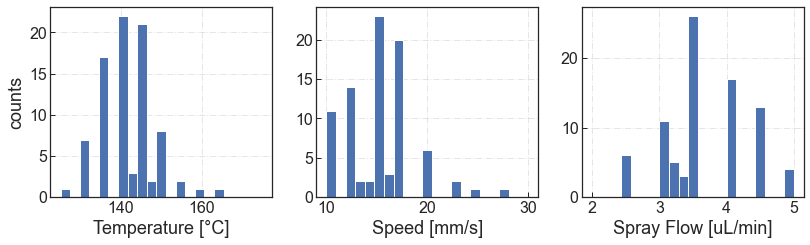

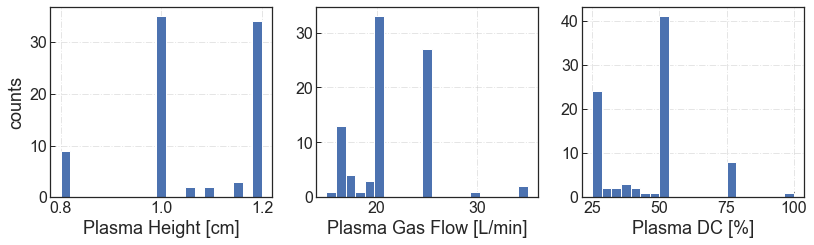

In [8]:
df = df_device.iloc[:,2:8]
#df = df_device.sort_values(by=list(df_device.iloc[:,[0,-1]].columns)).drop_duplicates('ML Condition', keep = 'last', ignore_index = True)
#df = df.iloc[:,2:8]
df_cols = df.columns
n_col = 3 # num of columns per row in the figure

for n in np.arange(0, 6, n_col):
    fig,axes = plt.subplots(1, n_col, figsize=(4.5*n_col, 3.5), sharey = False)
    fs = 20
    for i in np.arange(n_col):
        if n< len(df_cols):
            if n< len(var_array):
                axes[i].hist(df.iloc[:,n], bins= 21, range = (min(var_array[n]),max(var_array[n])))####
            else:
                axes[i].hist(df.iloc[:,n], bins= 21)####

            axes[i].set_xlabel(df_cols[n], fontsize = 18)
            #axes[i].set_xlim(min(var_array[n])*0.8,max(var_array[n])*1.05)
        else:
            axes[i].axis("off")
        n = n+1      
    axes[0].set_ylabel('counts', fontsize = 18)
    for i in range(len(axes)):
        axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
        axes[i].grid(True, linestyle='-.')
    plt.show()

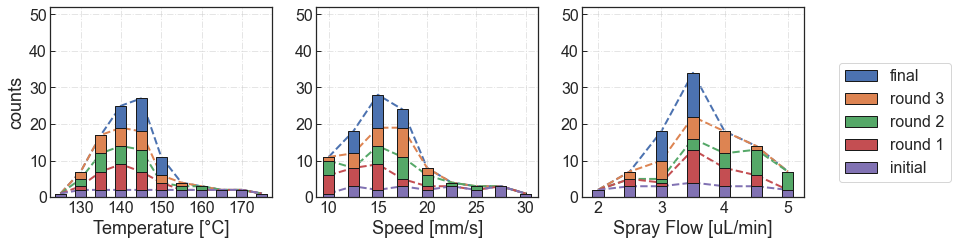

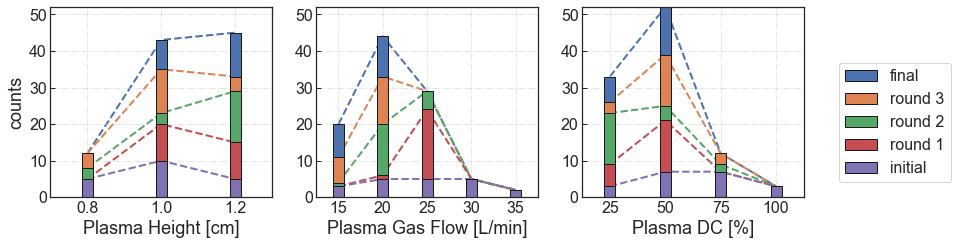

In [9]:
df = df_film.iloc[:,1:7]
df_cols = df.columns
n_col = 3 # num of columns per row in the figure

for n in np.arange(0, 6, n_col):
    fig,axes = plt.subplots(1, n_col, figsize=(4.5*n_col, 3.5), sharey = False)
    fs = 20
    for i in np.arange(n_col):
        if n< len(df_cols):
            c=0
            label= ['final','round 3','round 2', 'round 1', 'initial']
            for cond in [80, 60, 40, 20, 0]:
                
                data = df.iloc[0:cond+20,n]
                if n< len(var_array):
                    step = (max(var_array[n])-min(var_array[n]))/(len(var_array[n])-1)
                    h,e = np.histogram(data, bins=len(var_array[n]),range = (min(var_array[n])-step/2,max(var_array[n])+step/2))
                    axes[i].bar(var_array[n],h, width = 0.05*len(var_array[n])*step, edgecolor='k', alpha = 1, label = label[c])
                    axes[i].plot(var_array[n],h,'--', alpha = 1, zorder = 0, linewidth = 2)

                    axes[i].set_xlim(min(var_array[n])-step/2,max(var_array[n])+step/2)
                    #axes[i].set_xticks(np.linspace(min(var_array[n]),max(var_array[n]), 5))
            
                else:
                    axes[i].hist(data, bins= 21)####

                axes[i].set_xlabel(df_cols[n], fontsize = 18)
                axes[i].set_ylim(0, 52)
                axes[i].set_yticks([0, 10, 20, 30, 40, 50])

                c=c+1
                
            if n==0:#Temp
                axes[i].set_xticks([130, 140, 150, 160, 170])
            if n==1:#Speed
                axes[i].set_xticks([10, 15, 20, 25, 30])
            if n==4:#PlasmaGasFL
                axes[i].set_xticks([15, 20, 25, 30, 35])
            if n==5:#PlasmaDC
                axes[i].set_xticks([25, 50, 75, 100])
        
           
        else:
            axes[i].axis("off")
        n = n+1      
    axes[0].set_ylabel('counts', fontsize = 18)
    axes[-1].legend(fontsize = 16,bbox_to_anchor=(1.7, 0.75))

    for i in range(len(axes)):
        axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
        axes[i].grid(True, linestyle='-.')
    plt.show()

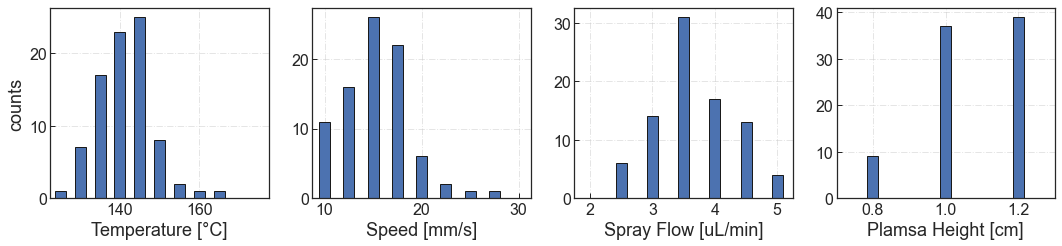

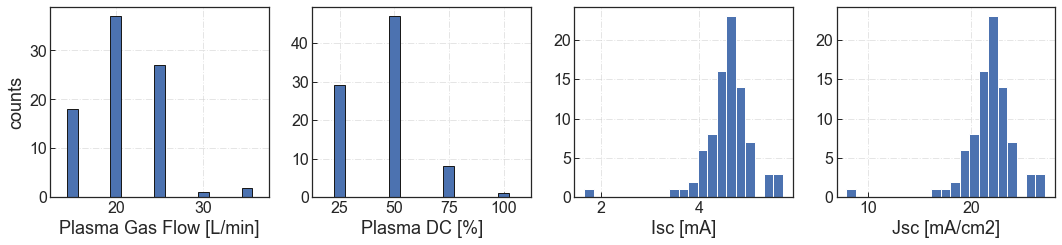

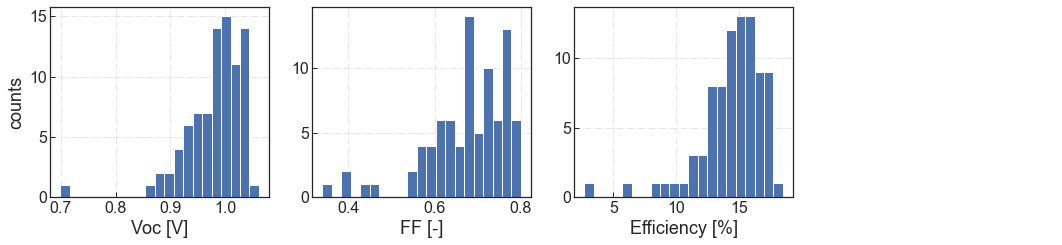

In [15]:
df = df_device.iloc[:,2:]
df_cols = df.columns
n_col = 4 # num of columns per row in the figure

for n in np.arange(0, 12, n_col):
    fig,axes = plt.subplots(1, n_col, figsize=(18, 3.5), sharey = False)
    fs = 20
    for i in np.arange(n_col):
        if n< len(df_cols):
            if n< len(var_array):
                step = (max(var_array[n])-min(var_array[n]))/(len(var_array[n])-1)
                h,e = np.histogram(df.iloc[:,n], bins=len(var_array[n]),range = (min(var_array[n])-step/2,max(var_array[n])+step/2))
                axes[i].bar(var_array[n],h, width = 0.05*len(var_array[n])*step, edgecolor='k')
                #axes[i].hist(df.iloc[:,n], bins= len(var_array[n]), range = (min(var_array[n])-step/2,max(var_array[n])+step/2))####
                axes[i].set_xlim(min(var_array[n])-step/2,max(var_array[n])+step/2)
                #axes[i].set_xticks(np.linspace(min(var_array[n]),max(var_array[n]), 3))

            else:
                axes[i].hist(df.iloc[:,n], bins= 21)####

            axes[i].set_xlabel(df_cols[n], fontsize = 18)
            
        else:
            axes[i].axis("off")
        n = n+1      
    axes[0].set_ylabel('counts', fontsize = 18)
    for i in range(len(axes)):
        axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
        axes[i].grid(True, linestyle='-.')
    plt.show()

No handles with labels found to put in legend.


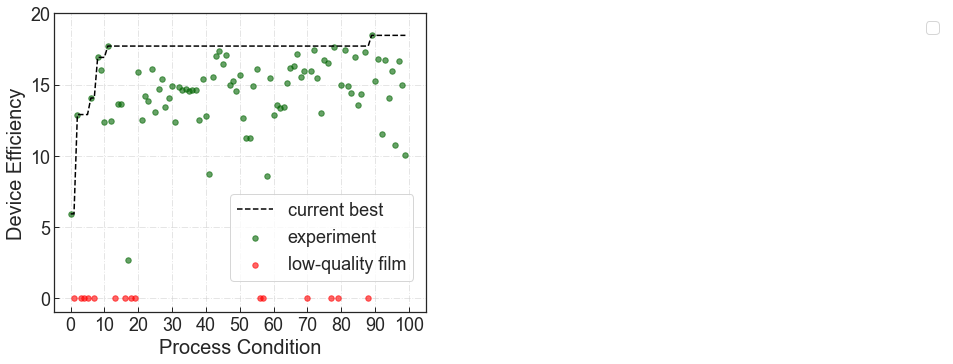

In [45]:
device_eff = df_device.sort_values('ML Condition').iloc[:,[0,-1]].values
device_eff_best = df_device.sort_values(by=list(df_device.iloc[:,[0,-1]].columns)).drop_duplicates('ML Condition', keep = 'last', ignore_index = True)
device_eff_best = device_eff_best.sort_values('ML Condition').iloc[:,[0,-1]].values
film_quality = df_film.sort_values('ML Condition').iloc[:,[0,-2]].values

fig, axes = plt.subplots(1, 2, figsize=(16, 5.5), sharey = False)
fs = 20
exp_cond = np.transpose(device_eff)[0]
exp_eff = np.transpose(device_eff)[1]

axes[0].scatter(exp_cond, exp_eff, facecolor = 'darkgreen',
            edgecolor = 'darkgreen', s = 30, alpha = 0.6, label = 'experiment')

unsuccess_film = np.transpose(film_quality[film_quality[:,-1] ==0])
axes[0].scatter(unsuccess_film[0], unsuccess_film[1],
                facecolor = 'red',
                edgecolor = 'red', alpha = 0.6,
                s = 30, label = 'low-quality film')

all_cond = np.concatenate([device_eff, np.transpose(unsuccess_film)])
all_cond = all_cond[np.argsort(all_cond[:,0])]
axes[0].plot(np.transpose(all_cond)[0], np.maximum.accumulate(np.transpose(all_cond)[1]), '--',
         marker = 'o', ms = 0, c = 'black', label = 'current best')

# axes[0].scatter(np.transpose(device_eff_best)[0], np.transpose(device_eff_best)[1],
#             edgecolor = 'navy', s = 20, alpha = 1)

axes[0].set_ylabel('Device Efficiency', fontsize = 20)
axes[0].set_xlabel('Process Condition', fontsize = 20)

axes[0].set_ylim(-1, 20)
axes[0].set_xlim(-5, 105)
axes[0].set_xticks(np.arange(0,110,10))
axes[0].legend(fontsize = fs*0.9, bbox_to_anchor=(0.45, 0.25))

for ax in axes:
    ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.9, grid_alpha = 0.5)
    ax.grid(True, linestyle='-.')
axes[1].axis("off")

plt.subplots_adjust(wspace = 0.4)
plt.legend(fontsize = fs*0.8)
plt.show()

No handles with labels found to put in legend.


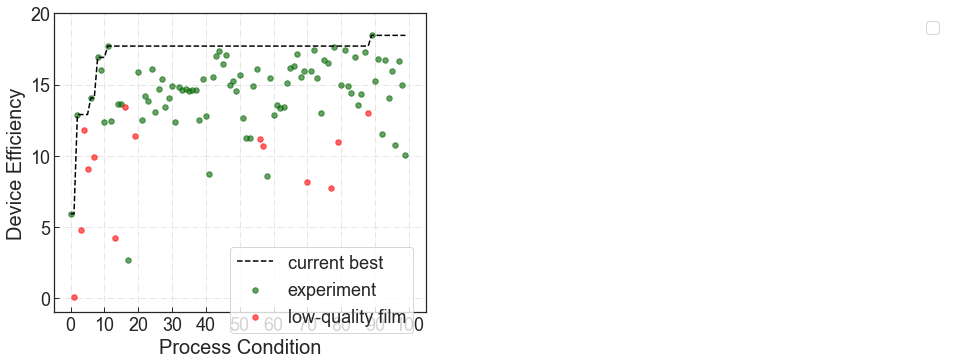

In [46]:

device_eff = df_device.sort_values('ML Condition').iloc[:,[0,-1]].values
device_eff_best = df_device.sort_values(by=list(df_device.iloc[:,[0,-1]].columns)).drop_duplicates('ML Condition', keep = 'last', ignore_index = True)
device_eff_best = device_eff_best.sort_values('ML Condition').iloc[:,[0,-1]].values
film_quality = df_film.sort_values('ML Condition').iloc[:,[0,-2]].values

fig, axes = plt.subplots(1, 2, figsize=(16, 5.5), sharey = False)
fs = 20
exp_cond = np.transpose(device_eff)[0]
exp_eff = np.transpose(device_eff)[1]

axes[0].scatter(exp_cond, exp_eff, facecolor = 'darkgreen',
            edgecolor = 'darkgreen', s = 30, alpha = 0.6, label = 'experiment')

unsuccess_film = np.transpose(film_quality[film_quality[:,-1] ==0])
# axes[0].scatter(unsuccess_film[0], unsuccess_film[1],
#                 facecolor = 'red',
#                 edgecolor = 'red', alpha = 0.6,
#                 s = 30, label = 'low-quality film')
axes[0].scatter(df_device_failed.iloc[:,0].values, df_device_failed.iloc[:,-1].values,
                facecolor = 'red',
                edgecolor = 'red', alpha = 0.6,
                s = 30, label = 'low-quality film')

all_cond = np.concatenate([device_eff, np.transpose(unsuccess_film)])
all_cond = all_cond[np.argsort(all_cond[:,0])]
axes[0].plot(np.transpose(all_cond)[0], np.maximum.accumulate(np.transpose(all_cond)[1]), '--',
         marker = 'o', ms = 0, c = 'black', label = 'current best')

# axes[0].scatter(np.transpose(device_eff_best)[0], np.transpose(device_eff_best)[1],
#             edgecolor = 'navy', s = 20, alpha = 1)

axes[0].set_ylabel('Device Efficiency', fontsize = 20)
axes[0].set_xlabel('Process Condition', fontsize = 20)

axes[0].set_ylim(-1, 20)
axes[0].set_xlim(-5, 105)
axes[0].set_xticks(np.arange(0,110,10))
axes[0].legend(fontsize = fs*0.9, bbox_to_anchor=(0.45, 0.25))

for ax in axes:
    ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.9, grid_alpha = 0.5)
    ax.grid(True, linestyle='-.')
axes[1].axis("off")

plt.subplots_adjust(wspace = 0.4)
plt.legend(fontsize = fs*0.8)
plt.show()

### Visualize the partial/marginalized dependence as scatter plot

The color is for variable Efficiency [%] with red as the highest and blue as the lowest


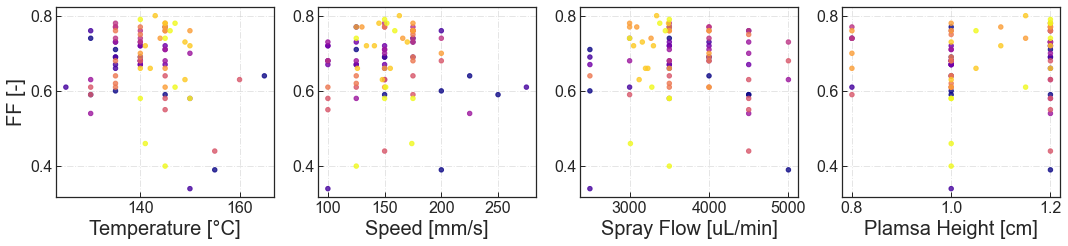

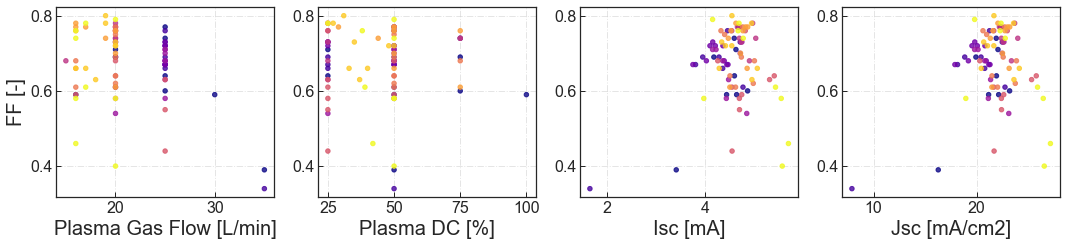

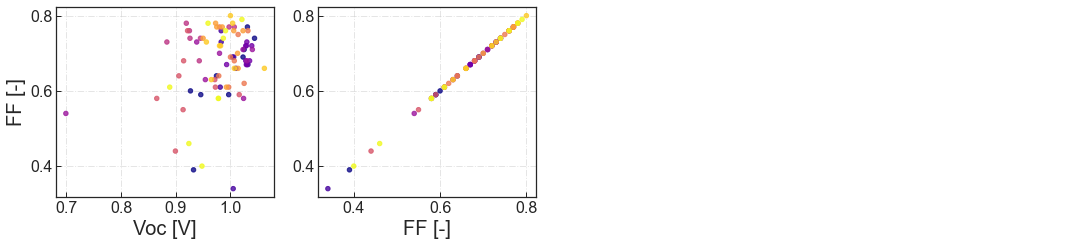

In [41]:
df = df_device.iloc[:,2:]

n_col = 4 # num of columns per row in the figure
y_indx = -2 #PCE (efficiency%)
color_indx = -1 #
column_names = df.columns.values
fs = 20

cmap = plt.get_cmap('plasma', 10)
print("The color is for variable", column_names[color_indx], "with red as the highest and blue as the lowest")

for n in np.arange(0, 12, n_col):
        fig,axes = plt.subplots(1, n_col, figsize=(18, 3.5), sharey = False)
        for i in np.arange(n_col):
            #print(n)
            if n< len(column_names)-1:
                im = axes[i].scatter(df.iloc[:,n],df.iloc[:,y_indx], 
                                     c=np.arange(len(df.iloc[:,color_indx])), s = 20, cmap=cmap, alpha =0.8, edgecolors = 'face')#c=df.iloc[:,color_indx]
                axes[i].set_xlabel(column_names[n], fontsize = fs)
            else:
                axes[i].axis("off")
                #axes[i].set_title(sf_cols[n])
            n = n+1      
        axes[0].set_ylabel(column_names[y_indx], fontsize = fs)
        for i in range(len(axes)):
            axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
            axes[i].grid(True, linestyle='-.')
        plt.show()

The color is for variable Speed [mm/s] with red as the highest and blue as the lowest


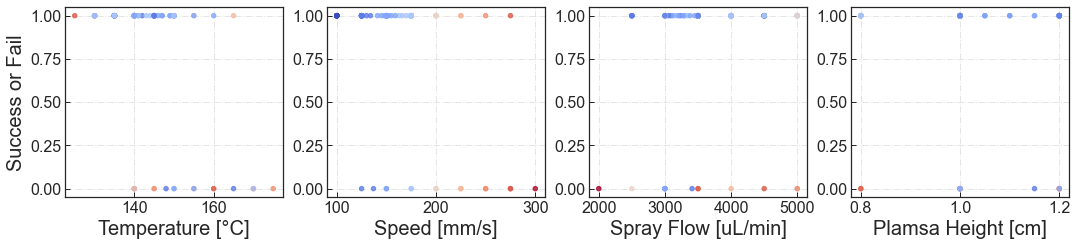

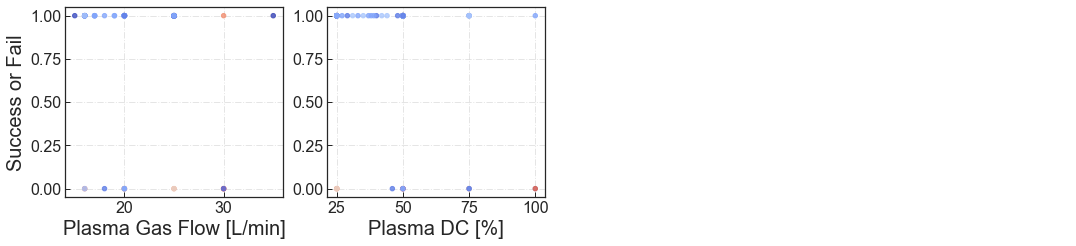

In [42]:
df = df_film.iloc[:,1:-1]

n_col = 4 # num of columns per row in the figure
y_indx = -1 #PCE (efficiency%)
color_indx = 1 #
column_names = df.columns.values
fs = 20

cmap = plt.get_cmap('coolwarm', 10)
print("The color is for variable", column_names[color_indx], "with red as the highest and blue as the lowest")

for n in np.arange(0, 8, n_col):
        fig,axes = plt.subplots(1, n_col, figsize=(18, 3.5), sharey = False)
        for i in np.arange(n_col):
            #print(n)
            if n< len(column_names)-1:
                im = axes[i].scatter(df.iloc[:,n],df.iloc[:,y_indx], 
                                     c=df.iloc[:,color_indx], s = 20, cmap=cmap, alpha =0.8, edgecolors = 'face')
                axes[i].set_xlabel(column_names[n], fontsize = fs)
            else:
                axes[i].axis("off")
                #axes[i].set_title(sf_cols[n])
            n = n+1      
        axes[0].set_ylabel(column_names[y_indx], fontsize = fs)
        for i in range(len(axes)):
            axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
            axes[i].grid(True, linestyle='-.')
        plt.show()

### Reduce the Data Complexity - Dimensionality Reduction using tSNE
- t-Student Stochastic Embedding (tSNE, tee-s-nee)
- More readings about `tSNE` vs `PCA` at this blog post: https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1


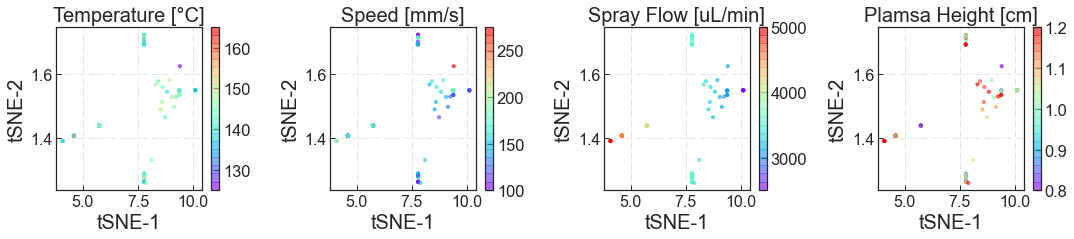

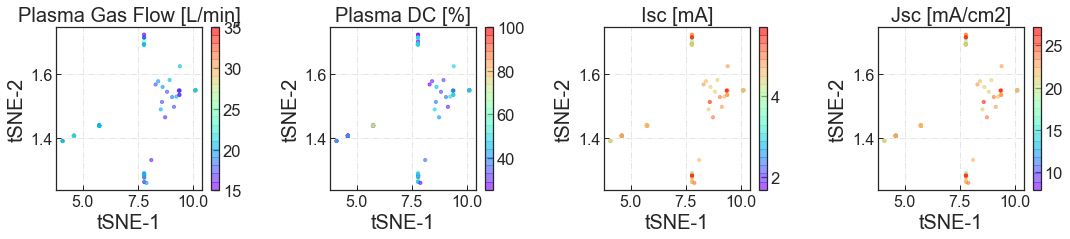

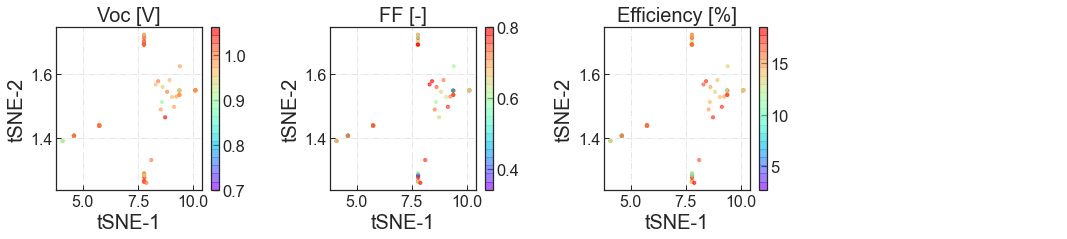

In [45]:
df = df_device.iloc[:,2:]

from sklearn.manifold import TSNE
tsne_2d_model = TSNE(n_components=2, init='random', random_state = 5,
                     learning_rate=5, perplexity = 50, n_iter = 1000) #perplexity is the key hyperparameter to tune
X_tsne_2d = tsne_2d_model.fit_transform(df.iloc[:,:-1].values)

n_col = 4 # num of columns per row in the figure
column_names = df.columns.values
for n in np.arange(0, 12, n_col):
    fig,axes = plt.subplots(1, n_col, figsize=(18, 3), sharey = False)
    cmap = plt.get_cmap('rainbow', 20)
    for i in np.arange(n_col):
        if n< len(column_names):
            c = df.iloc[:,n]# Choose which column is shown as the superimposed color
            im = axes[i].scatter(X_tsne_2d[:,0], X_tsne_2d[:,1], 
                                 marker = 'o', c=c, cmap=cmap, alpha =0.6, edgecolors = 'face', s = 10)
            title = column_names[n]
            axes[i].set_title(''+title, fontsize = fs)
            fig.colorbar(im, ax=axes[i], drawedges=False)
            axes[i].set_xlabel('tSNE-1', fontsize = fs)
            axes[i].set_ylabel('tSNE-2', fontsize = fs)
        else:
            axes[i].axis("off")     
        n = n+1  
        
    for i in range(len(axes)):
        axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
        axes[i].grid(True, linestyle='-.')
    plt.subplots_adjust(wspace = 0.5)
    plt.show()